In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
sys.path.append('..') 
from utils.dataset_creation_utils import *
from utils.analysis_utils import *
from utils.spectra_visualization_utils import *
from utils.peak_detector import * 
from utils.table_properties import common_metadata, maldi_classification_feature_names, lcms_classification_feature_names

dataset_folder = '../../DATASETS/'
results_folder = '../../detectionspipeline_results/'

# Load MALDI dataset

In [9]:
csv_base = 'Phoenix-prod_WF10144_all' #"Phoenix-dev_CMP60354-CMP60403-CMP60404_100mM-45C-50foldDilution_all"
reference_enzyme = 'ENZ10045'

# 1-sample
csv_fname_1 = f"{dataset_folder}{csv_base}_1.csv" 
df_all_1 = pd.read_csv(csv_fname_1, index_col=0)
df_all_1 = df_all_1[df_all_1.ctrl_type.isin(['EV','pos','exp'])]
df_all_1 = df_all_1[(df_all_1.ctrl_type=='EV') | (df_all_1.ctrl_type=='pos') | ((df_all_1.ctrl_type=='exp') & (~df_all_1.enzyme_barcode.isnull()))]
df_all_1.loc[df_all_1.ctrl_type=='EV', 'enzyme_barcode'] = 'DNA10001'
df_all_1.loc[df_all_1.ctrl_type=='pos', 'enzyme_barcode'] = reference_enzyme
df_all_1['true_score_binary'] = np.nan

# 2-sample
csv_fname_2 = f"{dataset_folder}{csv_base}_2.csv" 
df_all_2 = pd.read_csv(csv_fname_2, index_col=0)
df_all_2 = df_all_2[df_all_2.ctrl_type.isin(['EV','pos','exp'])]
df_all_2 = df_all_2[(df_all_2.ctrl_type=='EV') | (df_all_2.ctrl_type=='pos') | ((df_all_2.ctrl_type=='exp') & (~df_all_2.enzyme_barcode.isnull()))]
df_all_2.loc[df_all_2.ctrl_type=='EV', 'enzyme_barcode'] = 'DNA10001'
df_all_2.loc[df_all_2.ctrl_type=='pos', 'enzyme_barcode'] = reference_enzyme
df_all_2['true_score_binary'] = np.nan

## Get 1) binary labeled dataset + spectra from 1-sample detections table, and 2) non-binary labeled dataset from 2-sample detections table

In [10]:
plate = None
enzyme_barcode = None
substrate_barcode = ['CMP60354','CMP60403','CMP60404'] # ['CMP60403'] #
substrate_mz = 110.060039844
product_mz = 128.070604528
# exp_condition = '45C,3hIncubation,10mM'
HD_or_EV = 'EV'

# exp ctrls
filter_data_dict_all = {
# 'plate': (plate, 0),
# 'enzyme_barcode': (enzyme_barcode, 0),
'substrate_barcode': (substrate_barcode, 0),
'product_mz': (product_mz, 0),
# 'exp_condition': (exp_condition, 0),
'ctrl_type': ('exp', 0),
}

# pos ctrls
filter_data_dict_pos = filter_data_dict_all.copy()
filter_data_dict_pos.update({'ctrl_type': ('pos', 0)})

# neg ctrls
filter_data_dict_ref = filter_data_dict_all.copy()
if HD_or_EV == 'EV':
    if 'enzyme_barcode' in filter_data_dict_ref:
        filter_data_dict_ref.pop('enzyme_barcode')
    filter_data_dict_ref.update({'ctrl_type': ('EV', 0)})
elif HD_or_EV == 'HD':
#     filter_data_dict_ref.pop('enzyme_barcode')
    filter_data_dict_ref.update({'ctrl_type': ('HD', 0)})
    
# filter 1-sample detections table
df_all_rxn_1 = filter_dataframe_by_metrics(df_all_1, filter_data_dict_all)
df_all_pos_1 = filter_dataframe_by_metrics(df_all_1, filter_data_dict_pos)
df_all_ref_1 = filter_dataframe_by_metrics(df_all_1, filter_data_dict_ref)
rxn_spectra_ids = list(df_all_rxn_1.spectra_ids)
pos_spectra_ids = list(df_all_pos_1.spectra_ids)
ref_spectra_ids = list(df_all_ref_1.spectra_ids)
print(f"One-sample dataset for binary hits labeling: {len(df_all_rxn_1)} rxn spectra; {len(df_all_pos_1)} pos spectra; {len(df_all_ref_1)} ref spectra.")

# # filter 2-sample detections table
# df_all_rxn_2 = filter_dataframe_by_metrics(df_all_2, filter_data_dict_all)
# print(f"Two-sample dataset for nonbinary labeling (activity, enantioselectivity): {len(df_all_rxn_2)} unique sets of rxn replicates.")

One-sample dataset for binary hits labeling: 5632 rxn spectra; 128 pos spectra; 128 ref spectra.


#### pos vs. neg ctrls

In [11]:
# PLOT OVERLAID INDIVIDUAL SPECTRA
peak_locations = {'product':product_mz, 'substrate':substrate_mz}
specs_ctrls, npoints = get_spectra_to_label(None, pos_spectra_ids, ref_spectra_ids, npoints={'full':36447}, plots_to_display=['product','substrate'], normalize_to_mz=379.)

Retrieving ref spectra...
0 50 100 Retrieving rxn spectra...
0 50 100 

#### exp vs. neg ctrls

In [76]:
# PLOT OVERLAID INDIVIDUAL SPECTRA
peak_locations = {'product':product_mz, 'substrate':substrate_mz}
specs, npoints = get_spectra_to_label(None, rxn_spectra_ids, ref_spectra_ids, npoints={'full':36447}, plots_to_display=['product','substrate'], normalize_to_mz=379.)

Retrieving ref spectra...
0 50 100 Retrieving rxn spectra...
0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 

# Plot selected spectra

#### pos vs. neg ctrls

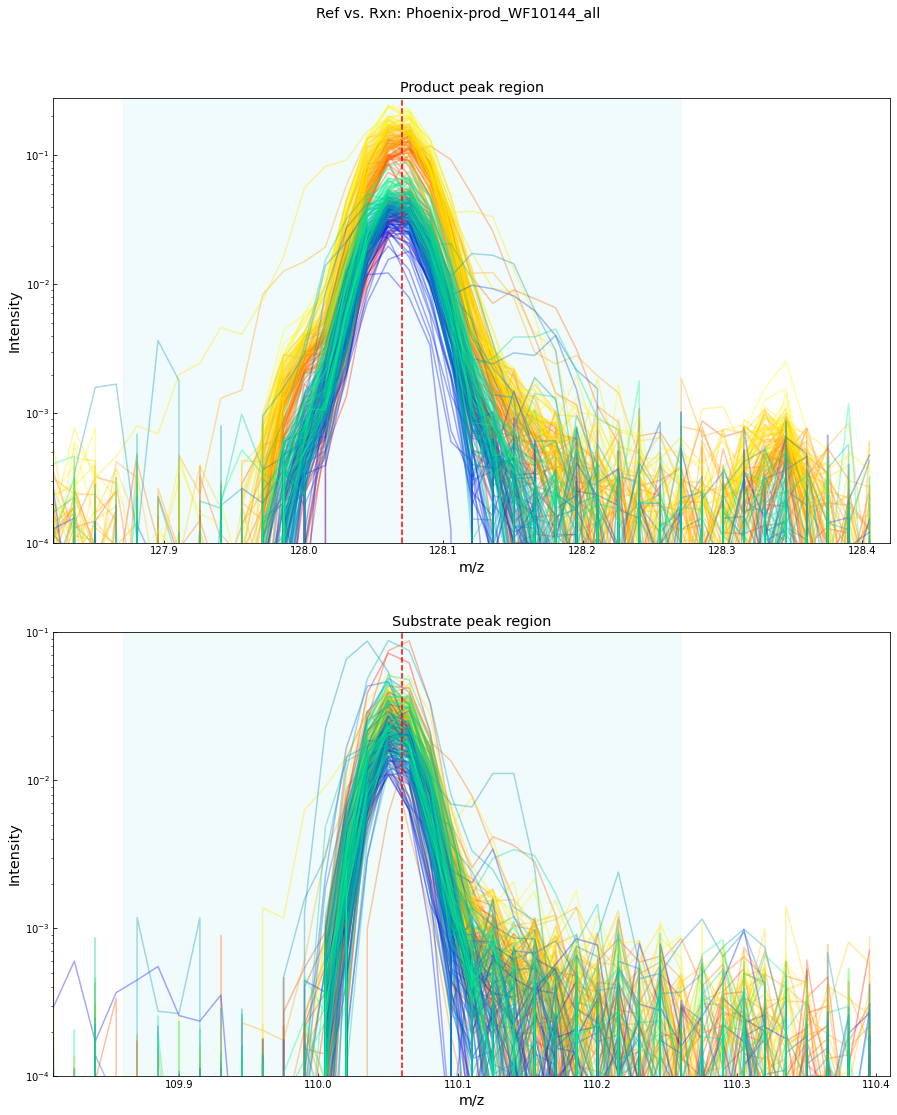

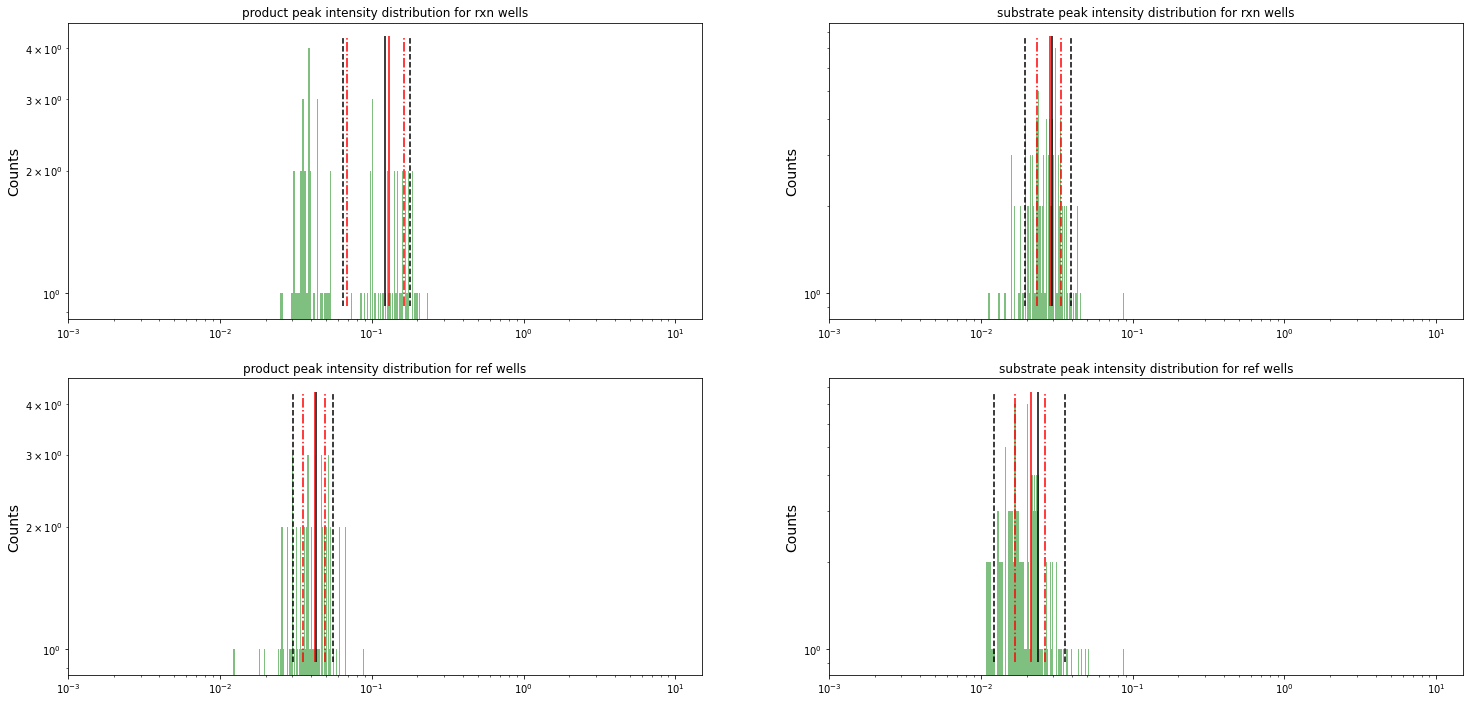

In [13]:
fname = csv_base 
specs_ctrls, mz_limits = process_spectra_to_label(specs_ctrls, peak_locations, mz_margins=[-0.25,0.35], sampling_int_mz=0.015, npoints={'product':40, 'substrate':40}, plots_to_display=['product','substrate'])
plot_spectra_to_label(specs_ctrls, peak_locations, mz_limits, plots_to_display=['product','substrate'], title=f"Ref vs. Rxn: {fname}", fn_save=None, showplot=True, verbose=True, colorcode_by='ctrltype', ref_to_foreground=True, plot_logscale=True)
specs_ctrls = plot_peak_distribution_stats(specs_ctrls, logscale_yaxis=True, logscale_xaxis=True, xlim=[1e-3,15])

#### exp vs. neg ctrls

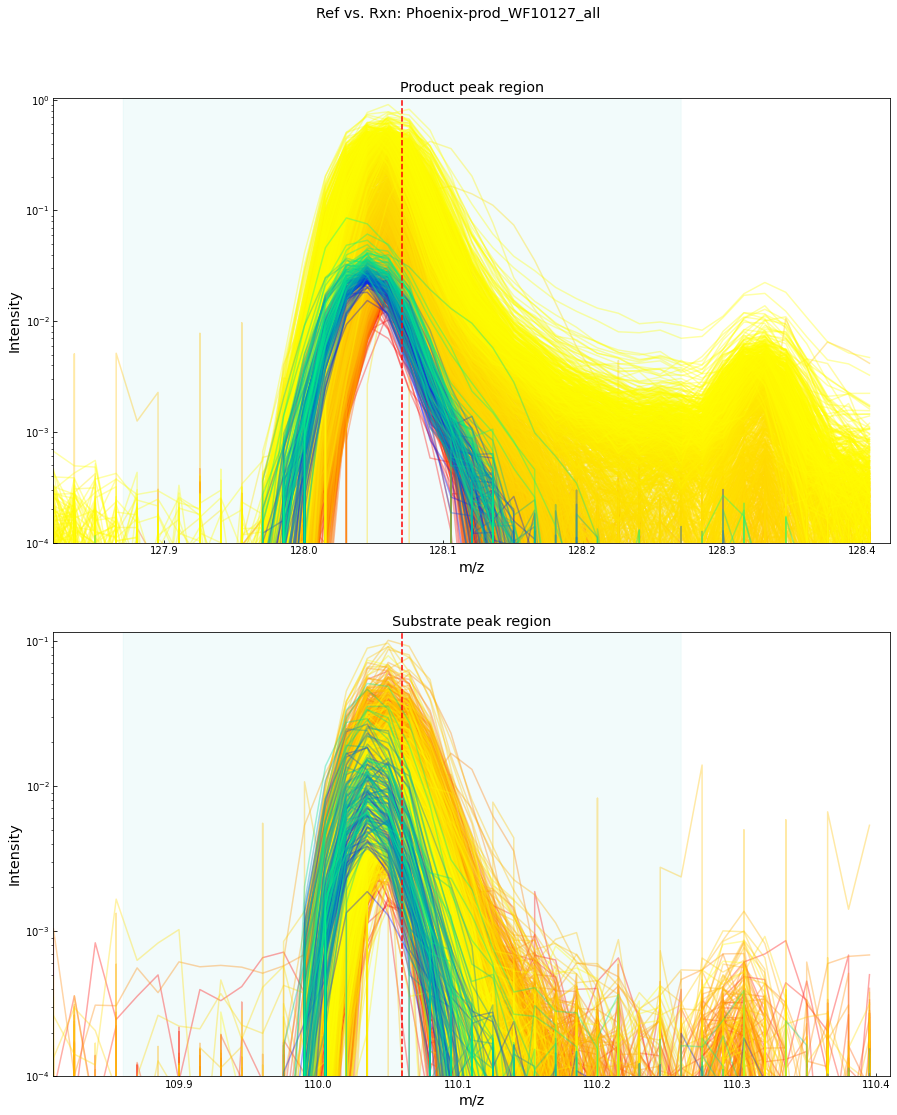

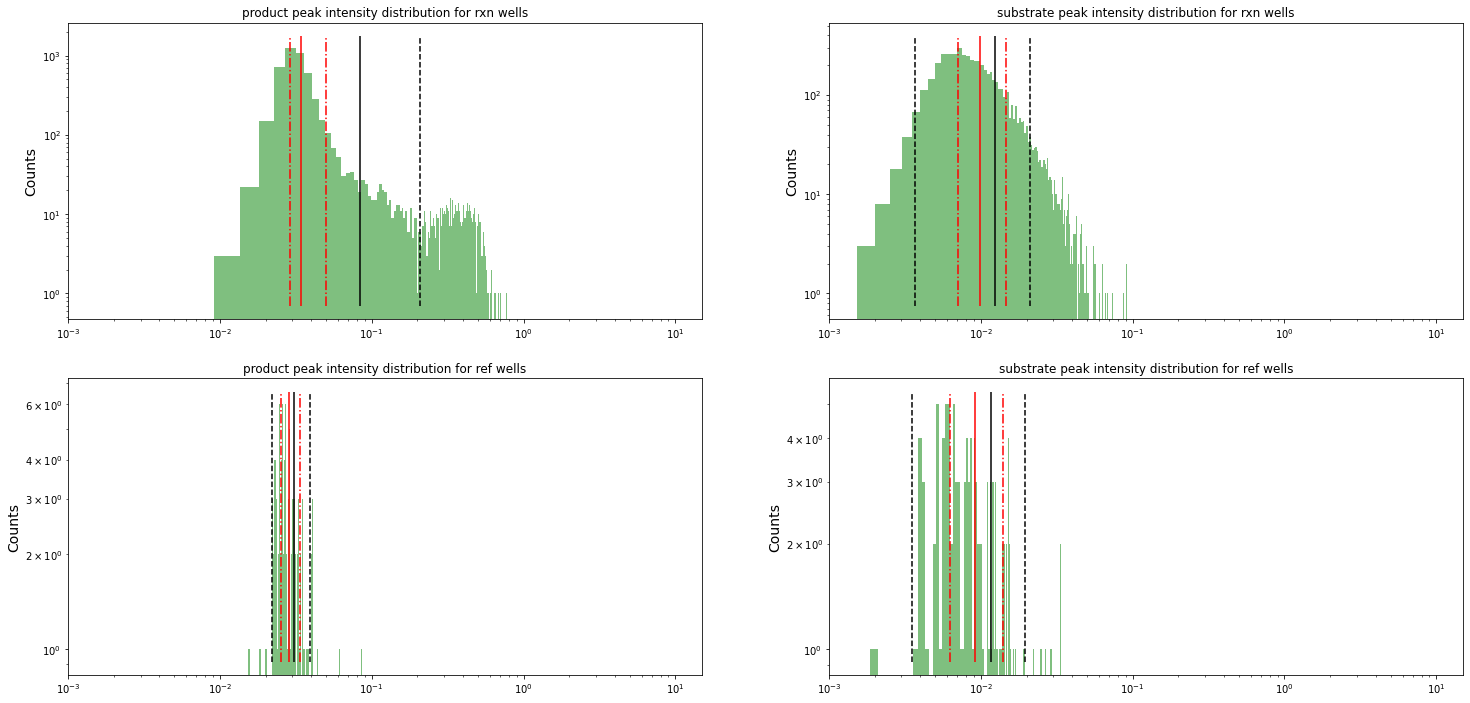

In [78]:
fname = csv_base #'100mM-45C-50foldDilution' #exp_condition
specs, mz_limits = process_spectra_to_label(specs, peak_locations, mz_margins=[-0.25,0.35], sampling_int_mz=0.015, npoints={'product':40, 'substrate':40}, plots_to_display=['product','substrate'])
plot_spectra_to_label(specs, peak_locations, mz_limits, plots_to_display=['product','substrate'], title=f"Ref vs. Rxn: {fname}", fn_save=None, showplot=True, verbose=True, colorcode_by='ctrltype', ref_to_foreground=True, plot_logscale=True)
specs = plot_peak_distribution_stats(specs, logscale_yaxis=True, logscale_xaxis=True, xlim=[1e-3,15])

## Update labels & re-plot spectra color-coded by labels

In [237]:
prod_pk_stdz_thres = 0.045
rxn_thres_factor = 1
idx_thres_ref = None
idx_thres_rxn = None

if specs['ref']['max_int_product'][-1] > prod_pk_stdz_thres:
    idx_thres_ref = np.where(specs['ref']['max_int_product'] >= prod_pk_stdz_thres)[0][-1]
    
if specs['ref']['max_int_product'][0] < prod_pk_stdz_thres*rxn_thres_factor:
    idx_thres_rxn = np.where(specs['rxn']['max_int_product'] < prod_pk_stdz_thres*rxn_thres_factor)[0][-1]

print(f"threshold index: REF={idx_thres_ref}; RXN={idx_thres_rxn}")

threshold index: REF=63; RXN=5284


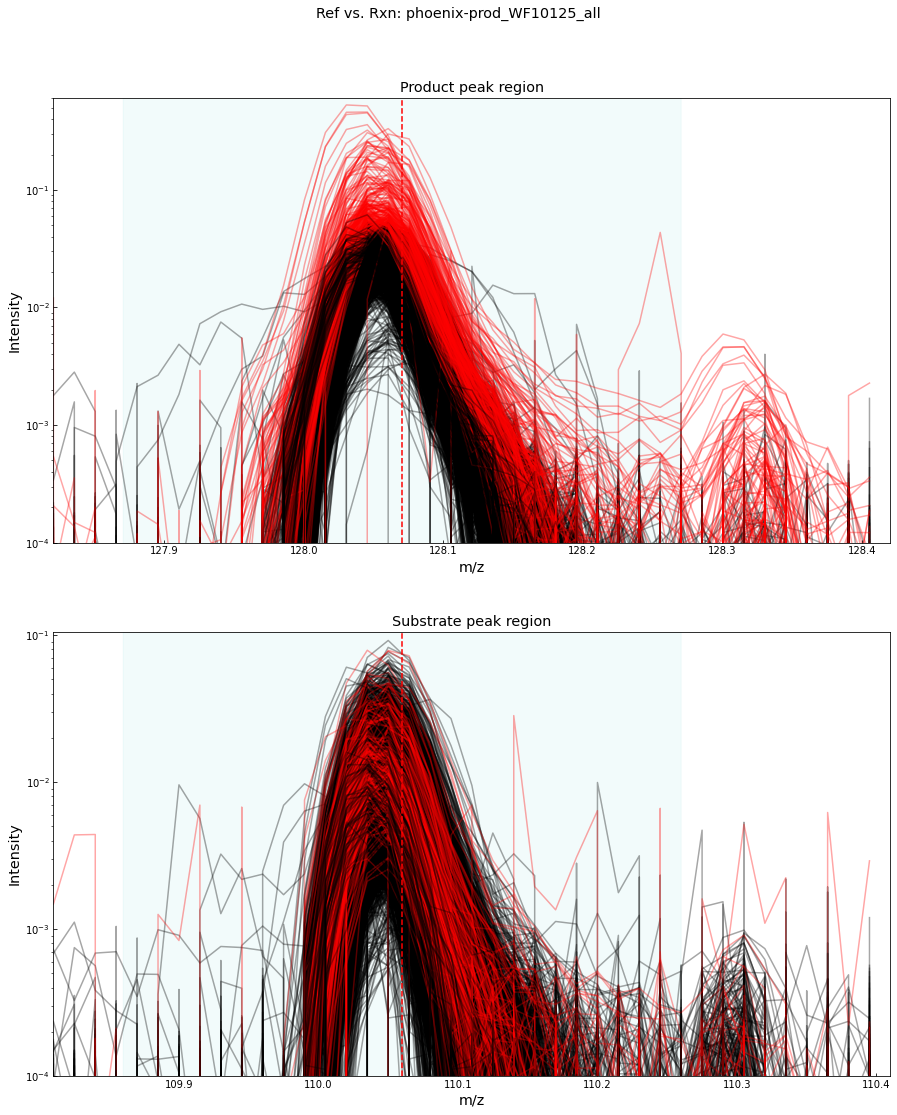

In [231]:
# reinitialize labels to defaults
specs['ref']['labels'][:] = 0
specs['rxn']['labels'][:] = 1

# modify labels
if idx_thres_ref is not None:
    specs['ref']['labels'][-(len(specs['ref']['labels'])-idx_thres_ref):] = 1
if idx_thres_rxn is not None:
    specs['rxn']['labels'][:idx_thres_rxn] = 0

# plot labeled spectra
plot_spectra_to_label(specs, peak_locations, mz_limits, plots_to_display=['product','substrate'], title=f"Ref vs. Rxn: {fname}", fn_save=None, showplot=True, verbose=True, colorcode_by='label', ref_to_foreground=True, plot_logscale=True)

## Update dataframe with labels and save

### Label 1-sample dataset using visualized spectra labels

In [ ]:
# get aggregated dataframe
df_1 = pd.concat([df_all_rxn_1, df_all_ref_1])
df_1_labeled = df.copy()

# aggregate manually curated labels
spec_ids_list = []
labels_list = []
for k in ['ref','rxn']:
    spec_ids = list(specs[k]['spec_ids'])
    labels = list(specs[k]['labels'])
    print(f"[{k}] Hit rate: {np.round(np.mean(np.array(labels)),3)} (n={len(labels)})")
    spec_ids_list += spec_ids
    labels_list += labels

# update df_all_1 (one-to-many): look for rows with that address, plate, run, and product_mz value
for spec_id, label in zip(spec_ids_list, labels_list): 
    address, run, plate = spec_id.split('_')
    df_1_labeled.at[(df_1.address==address) & (df_1.run==run) & (df_1.plate==plate) & (df_1.product_mz==product_mz), 'true_score_binary'] = label

print('Mean overall binary score:', np.mean(np.array(labels)))

### Label 1-sample dataset directly using predetermined thresholds

In [6]:
prod_pk_stdz_thres = 0.045
rxn_thres_factor = 1
maldi_label_conditions = {'pk_prod_stdz_379':{'pk_thres':prod_pk_stdz_thres, 'rxn_thres_factor':rxn_thres_factor}}
neg_ctrltype = HD_or_EV
df_1_labeled = df_all_1.copy()

# label maldi data by maldi peaks
df_1_labeled['true_score_binary'] = 0
for metric, conditions in maldi_label_conditions.items():
    pk_thres = conditions['pk_thres']
    rxn_thres_factor = conditions['rxn_thres_factor']
    # label neg ctrl data above pk_thres as '1'
    df_1_labeled.loc[((df_1_labeled['ctrl_type']==neg_ctrltype) & (df_1_labeled[metric]>pk_thres)), 'true_score_binary'] = 1
    # label pos and exp ctrl data above pk_thres * rxn_thres_factor as '0'
    df_1_labeled.loc[(df_1_labeled['ctrl_type'].isin(['exp','pos']) & (df_1_labeled[metric]>pk_thres*rxn_thres_factor)), 'true_score_binary'] = 1

for ctrl_type in ['EV', 'pos', 'exp']:
    df_1_labeled_ctrltype = df_1_labeled[df_1_labeled.ctrl_type==ctrl_type]
    print(f"[{ctrl_type}] Hit rate: {round(df_1_labeled_ctrltype.true_score_binary.mean(),3)} (n={len(df_1_labeled_ctrltype)})")

[EV] Hit rate: 0.036 (n=192)
[pos] Hit rate: 0.902 (n=264)
[exp] Hit rate: 0.047 (n=27228)


### Label 2-sample dataset using 1-sample results

In [7]:
df_2_labeled = df_all_2.copy()

for i in list(df_2_labeled.index):
    spectra_ids = df_2_labeled.loc[i].spectra_ids.split(', ')
    df_1_replicates = df_1_labeled[df_1_labeled.spectra_ids.isin(spectra_ids)]
    true_score_binary = (df_1_replicates.true_score_binary.mean() >= 0.5)*1
    df_2_labeled.loc[i, 'true_score_binary'] = true_score_binary
    
for ctrl_type in ['EV', 'pos', 'exp']:
    df_2_labeled_ctrltype = df_2_labeled[df_2_labeled.ctrl_type==ctrl_type]
    print(f"[{ctrl_type}] Hit rate: {round(df_2_labeled_ctrltype.true_score_binary.mean(),3)} (n={len(df_2_labeled_ctrltype)})")

[EV] Hit rate: nan (n=0)
[pos] Hit rate: 1.0 (n=3)
[exp] Hit rate: 0.037 (n=2397)


### Combine rows with same enzyme barcode

#### 1-sample

In [8]:
split_by_list = ['CMP60354','CMP60403','CMP60404']
s_colnames = [f'source_plate_{s}' for s in split_by_list]

df_1_labeled['source_plate_grp'] = None
df_1_labeled_exp = df_1_labeled[df_1_labeled.ctrl_type=='exp'].copy()
df_1_labeled_ctrl = df_1_labeled[df_1_labeled.ctrl_type.isin(['pos','EV'])].copy()
# label experimental samples
df_maldi_1_merge_exp = combine_rows_by_unique_enzyme(df_1_labeled_exp, common_metadata+['source_plate_grp'], maldi_detections_derived+['source_plate','source_address','true_score_binary'], combine_by=['enzyme_barcode', 'address'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr')
# label ctrl samples
source_plate_groupings = list(df_maldi_1_merge_exp[s_colnames].drop_duplicates(subset=s_colnames).dropna().sort_values(by=s_colnames).reset_index(drop=True).to_records())
print(source_plate_groupings)
for source_plate_group in source_plate_groupings:
    source_plate_group = list(source_plate_group)
    grp_idx = source_plate_group[0]
    plates = list(source_plate_group[1:])
    df_maldi_1_merge_exp.loc[df_maldi_1_merge_exp['source_plate_CMP60354'].isin(plates), 'source_plate_grp'] = int(grp_idx)
    df_1_labeled_ctrl.loc[df_1_labeled_ctrl.source_plate.isin(plates), 'source_plate_grp'] = int(grp_idx)
df_maldi_1_merge_ctrl = combine_rows_by_unique_enzyme(df_1_labeled_ctrl, common_metadata+['source_plate_grp'], maldi_detections_derived+['source_plate','source_address','true_score_binary'], combine_by=['enzyme_barcode', 'address', 'source_plate_grp'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr')
df_maldi_1_merge = pd.concat((df_maldi_1_merge_exp,df_maldi_1_merge_ctrl))
print(len(df_maldi_1_merge))

[(0, 'PLT17264', 'PLT17262', 'PLT17263'), (1, 'PLT17270', 'PLT17268', 'PLT17266'), (2, 'PLT17271', 'PLT17272', 'PLT17267'), (3, 'PLT17273', 'PLT17269', 'PLT17265')]
4640


#### 2-sample

In [9]:
split_by_list = ['CMP60354','CMP60403','CMP60404']
s_colnames = [f'source_plate_{s}' for s in split_by_list]

df_2_labeled['source_plate_grp'] = None
df_2_labeled_exp = df_2_labeled[df_2_labeled.ctrl_type=='exp'].copy()
df_2_labeled_ctrl = df_2_labeled[df_2_labeled.ctrl_type.isin(['pos','EV'])].copy()
# label experimental samples
df_maldi_2_merge_exp = combine_rows_by_unique_enzyme(df_2_labeled_exp, common_metadata+['source_plate_grp'], maldi_detections_derived+['source_plate','source_address','true_score_binary'], combine_by=['enzyme_barcode', 'address'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr')
# label ctrl samples
source_plate_groupings = list(df_maldi_2_merge_exp[s_colnames].drop_duplicates(subset=s_colnames).dropna().sort_values(by=s_colnames).reset_index(drop=True).to_records())
print(source_plate_groupings)
for source_plate_group in source_plate_groupings:
    source_plate_group = list(source_plate_group)
    grp_idx = source_plate_group[0]
    plates = list(source_plate_group[1:])
    df_maldi_2_merge_exp.loc[df_maldi_2_merge_exp['source_plate_CMP60354'].isin(plates), 'source_plate_grp'] = int(grp_idx)
    df_2_labeled_ctrl.loc[df_2_labeled_ctrl.source_plate.isin(plates), 'source_plate_grp'] = int(grp_idx)
df_maldi_2_merge_ctrl = combine_rows_by_unique_enzyme(df_2_labeled_ctrl, common_metadata+['source_plate_grp'], maldi_detections_derived+['source_plate','source_address','true_score_binary'], combine_by=['enzyme_barcode', 'address', 'source_plate_grp'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr')
df_maldi_2_merge = pd.concat((df_maldi_2_merge_exp,df_maldi_2_merge_ctrl))
print(len(df_maldi_2_merge))

[(0, 'PLT17264', 'PLT17262', 'PLT17263'), (1, 'PLT17270', 'PLT17268', 'PLT17266'), (2, 'PLT17271', 'PLT17272', 'PLT17267'), (3, 'PLT17273', 'PLT17269', 'PLT17265')]
800


### Save CSVs

In [209]:
save_dataframe(df_1_labeled, f"{csv_base}_1_BINARY-LABELED.csv", dataset_folder)
save_dataframe(df_2_labeled, f"{csv_base}_2_BINARY-LABELED.csv", dataset_folder)

# Load dataset with labels and view color-coded spectra

In [155]:
# csv_labeled = f"{dataset_folder}phoenix-dev_EXP10086_all_45C-3hIncubation-10mM_1_BINARY-LABELED.csv"
csv_labeled = f"{dataset_folder}Phoenix-dev_CMP60354-CMP60403-CMP60404_100mM-45C-50foldDilution_all_1_BINARY-LABELED.csv"
df_labeled = pd.read_csv(csv_labeled, index_col=0)

substrate_mz = 110.060039844
product_mz = 128.070604528

label0_spectra_ids = list(df_labeled[df_labeled.true_score_binary==0].spectra_ids)
label1_spectra_ids = list(df_labeled[df_labeled.true_score_binary==1].spectra_ids)
print(f"One-sample dataset for binary hits labeling: {len(label0_spectra_ids)} label 0 spectra; {len(label1_spectra_ids)} label 1 spectra.")

# PLOT OVERLAID INDIVIDUAL SPECTRA
peak_locations = {'product':product_mz, 'substrate':substrate_mz}
specs_labeled, npoints = get_spectra_to_label(None, label1_spectra_ids, label0_spectra_ids, npoints={'full':36447}, plots_to_display=['product','substrate'], normalize_to_mz=379.)

One-sample dataset for binary hits labeling: 256 label 0 spectra; 128 label 1 spectra.
Retrieving ref spectra...
0 50 100 150 200 250 Retrieving rxn spectra...
0 50 100 

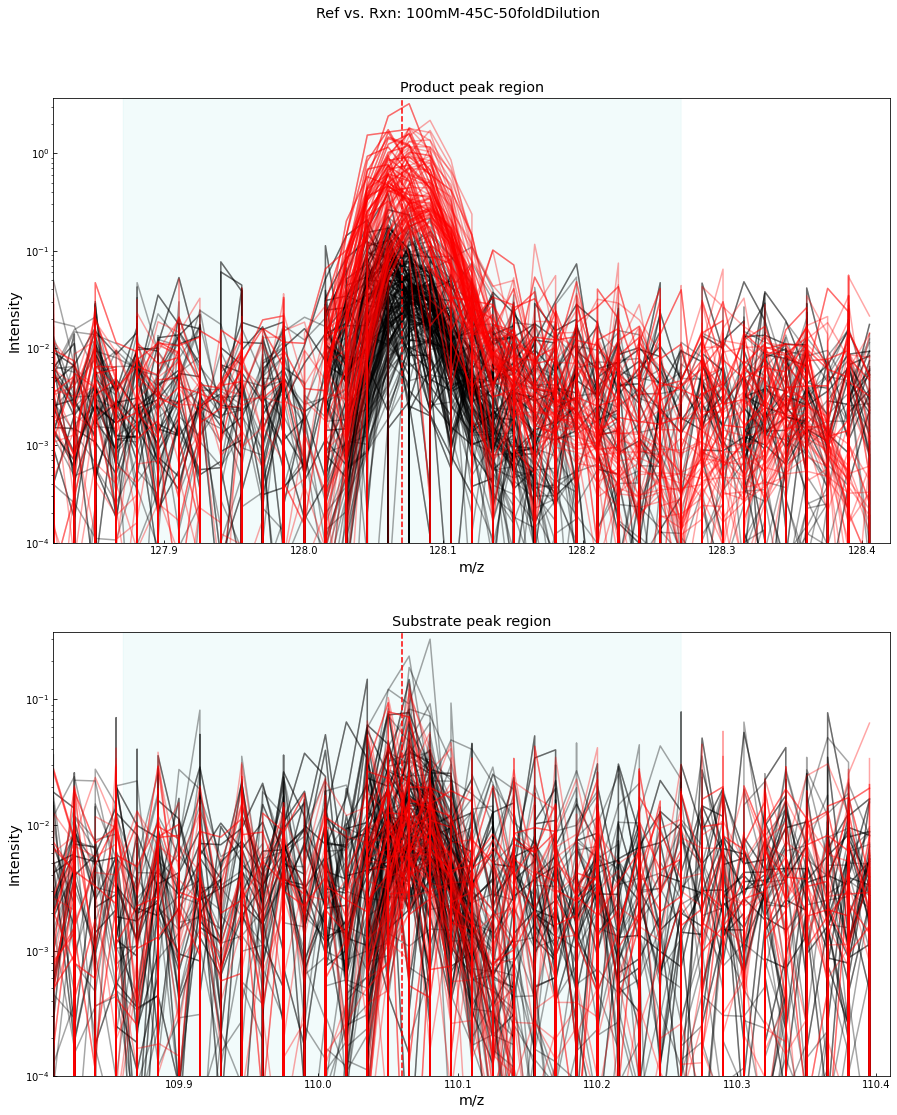

In [157]:
# plot labeled spectra
specs_labeled, mz_limits = process_spectra_to_label(specs_labeled, peak_locations, mz_margins=[-0.25,0.35], sampling_int_mz=0.015, npoints={'product':40, 'substrate':40}, plots_to_display=['product','substrate'])
plot_spectra_to_label(specs_labeled, peak_locations, mz_limits, plots_to_display=['product','substrate'], title=f"Ref vs. Rxn: {fname}", fn_save=None, showplot=True, verbose=True, colorcode_by='label', ref_to_foreground=False, plot_logscale=True)

# Load LCMS dataset

3479


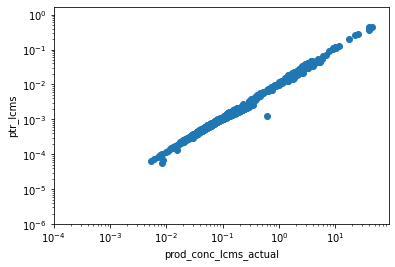

In [30]:
csv_base = 'Phoenix-prod_WF10125_LCMS'
csv_fname = f"{dataset_folder}{csv_base}.csv" 
df_lcms = pd.read_csv(csv_fname, index_col=0)
df_lcms = df_lcms[df_lcms.ctrl_type.isin(['EV','pos','exp'])]
df_lcms = df_lcms[(df_lcms.ctrl_type=='EV') | ((df_lcms.ctrl_type=='pos') & (~df_lcms.enzyme_barcode.isnull())) | ((df_lcms.ctrl_type=='exp') & (~df_lcms.enzyme_barcode.isnull()))]
df_lcms.loc[df_lcms.ctrl_type=='EV', 'enzyme_barcode'] = 'DNA10001'
df_lcms.loc[df_lcms.ctrl_type=='pos', 'enzyme_barcode'] = 'ENZ10045'
print(len(df_lcms))

# basic linearity check to see if data is ok
plt.scatter(df_lcms.prod_conc_lcms_actual, df_lcms.ptr_lcms)
plt.xlabel('prod_conc_lcms_actual')
plt.ylabel('ptr_lcms')
plt.xlim([max(1e-4, df_lcms['prod_conc_lcms_actual'].min()/2), df_lcms['prod_conc_lcms_actual'].max()*2])
plt.ylim([max(1e-6, df_lcms['ptr_lcms'].min()/2), df_lcms['ptr_lcms'].max()*2])
plt.xscale('log')
plt.yscale('log')
plt.show()

### Combine rows with the same enzyme barcode

In [31]:
# df_lcms_merge = combine_rows_by_unique_enzyme(df_lcms, common_metadata, lcms_detections_derived+['source_plate','source_address'], split_by_list=['CMP60354','CMP60403','CMP60404'])
split_by_list = ['CMP60354','CMP60403','CMP60404']
s_colnames = [f'source_plate_{s}' for s in split_by_list]

# label experimental samples
df_lcms['source_plate_grp'] = None
df_lcms_exp = df_lcms[df_lcms.ctrl_type=='exp'].copy()
df_lcms_ctrl = df_lcms[df_lcms.ctrl_type.isin(['pos','EV'])].copy()
df_lcms_merge_exp = combine_rows_by_unique_enzyme(df_lcms_exp, common_metadata+['source_plate_grp'], lcms_detections_derived+['source_plate','source_address'], combine_by=['enzyme_barcode', 'address'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr_lcms')
# label ctrl samples
source_plate_groupings = list(df_lcms_merge_exp[s_colnames].drop_duplicates(subset=s_colnames).dropna().sort_values(by=s_colnames).reset_index(drop=True).to_records())
print(source_plate_groupings)
for source_plate_group in source_plate_groupings:
    source_plate_group = list(source_plate_group)
    grp_idx = source_plate_group[0]
    plates = list(source_plate_group[1:])
    plate_filt_str = ''
    for i, plate in enumerate(plates):
        plate_filt_str += f"(df_lcms_merge_exp['source_plate_{split_by_list[i]}']=='{plate}') & "
    plate_filt_str = plate_filt_str[:-3]
    print(plate_filt_str)
    df_lcms_merge_exp.loc[eval(plate_filt_str), 'source_plate_grp'] = int(grp_idx)

    df_lcms_ctrl.loc[df_lcms_ctrl.source_plate.isin(plates), 'source_plate_grp'] = int(grp_idx)
df_lcms_merge_ctrl = combine_rows_by_unique_enzyme(df_lcms_ctrl, common_metadata+['source_plate_grp'], lcms_detections_derived+['source_plate','source_address'], combine_by=['enzyme_barcode', 'address', 'source_plate_grp'], split_by_list=['CMP60354','CMP60403','CMP60404'], test_colname='ptr_lcms')
df_lcms_merge = pd.concat((df_lcms_merge_exp,df_lcms_merge_ctrl))
print(len(df_lcms_merge))

[(0, 'PLT17264', 'PLT17262', 'PLT17263'), (1, 'PLT17270', 'PLT17268', 'PLT17266'), (2, 'PLT17271', 'PLT17272', 'PLT17267'), (3, 'PLT17273', 'PLT17269', 'PLT17265')]
(df_lcms_merge_exp['source_plate_CMP60354']=='PLT17264') & (df_lcms_merge_exp['source_plate_CMP60403']=='PLT17262') & (df_lcms_merge_exp['source_plate_CMP60404']=='PLT17263')
(df_lcms_merge_exp['source_plate_CMP60354']=='PLT17270') & (df_lcms_merge_exp['source_plate_CMP60403']=='PLT17268') & (df_lcms_merge_exp['source_plate_CMP60404']=='PLT17266')
(df_lcms_merge_exp['source_plate_CMP60354']=='PLT17271') & (df_lcms_merge_exp['source_plate_CMP60403']=='PLT17272') & (df_lcms_merge_exp['source_plate_CMP60404']=='PLT17267')
(df_lcms_merge_exp['source_plate_CMP60354']=='PLT17273') & (df_lcms_merge_exp['source_plate_CMP60403']=='PLT17269') & (df_lcms_merge_exp['source_plate_CMP60404']=='PLT17265')
1160


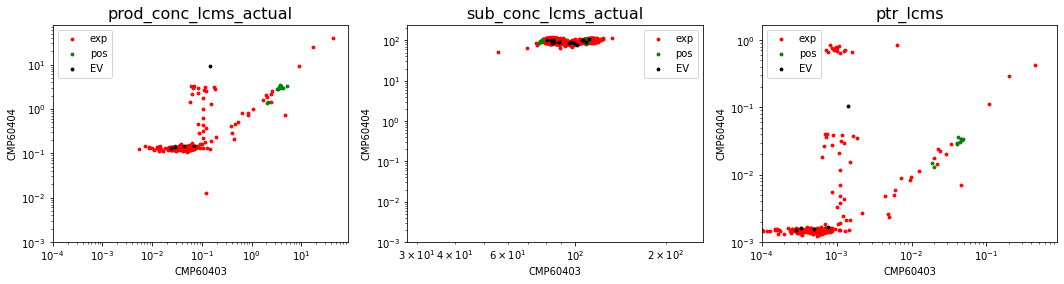

In [66]:
plot_lcms_metrics_for_ctrls(df_lcms_merge, x_suffix='CMP60403', y_suffix='CMP60404', ctrls_to_plot=['exp','pos','EV'])

# Combine MALDI and LCMS data

In [26]:
df_maldi_lcms = combine_maldi_lcms_data(df_maldi_2_merge, df_lcms_merge, 
                                        combine_by=['enzyme_barcode','source_address_CMP60354', 'source_plate_grp'],
                                       col_suffix_list=['CMP60354','CMP60403','CMP60404'])

('DNA10001', 'X2Y1', '0')
('DNA10001', 'X2Y1', '1')
('DNA10001', 'X2Y1', '2')
('DNA10001', 'X2Y1', '3')
('DNA10001', 'X2Y2', '0')
('DNA10001', 'X2Y2', '1')
('DNA10001', 'X2Y2', '2')
('DNA10001', 'X2Y2', '3')
('DNA10001', 'X2Y3', '0')
('DNA10001', 'X2Y3', '1')
('DNA10001', 'X2Y3', '2')
('DNA10001', 'X2Y3', '3')
('DNA10001', 'X2Y4', '0')
('DNA10001', 'X2Y4', '1')
('DNA10001', 'X2Y4', '2')
('DNA10001', 'X2Y4', '3')
('ENZ15405', 'X14Y4', 'None')


78
Spearman's rho for pk_prod_stdz_172_CMP60354 (MALDI) vs. pk_prod_stdz_172_CMP60354 (LCMS): 0.8264
Spearman's rho for pk_sub_stdz_172_CMP60354 (MALDI) vs. pk_sub_stdz_172_CMP60354 (LCMS): 0.2498
Spearman's rho for ptr_CMP60354 (MALDI) vs. ptr_CMP60354 (LCMS): 0.4709


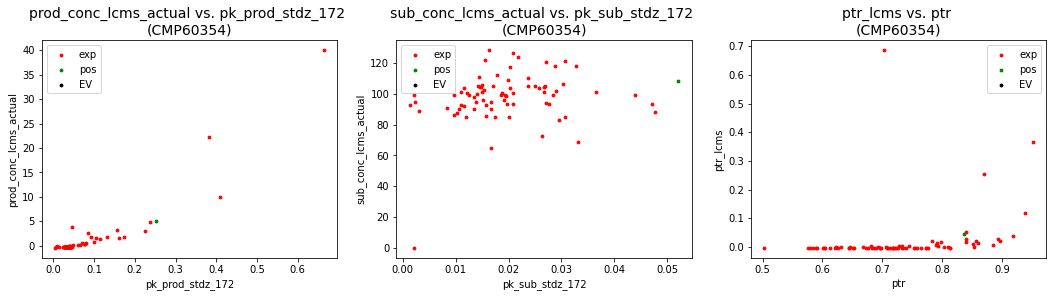

Spearman's rho for pk_prod_stdz_172_CMP60403 (MALDI) vs. pk_prod_stdz_172_CMP60403 (LCMS): 0.6478
Spearman's rho for pk_sub_stdz_172_CMP60403 (MALDI) vs. pk_sub_stdz_172_CMP60403 (LCMS): -0.2402
Spearman's rho for ptr_CMP60403 (MALDI) vs. ptr_CMP60403 (LCMS): 0.4883


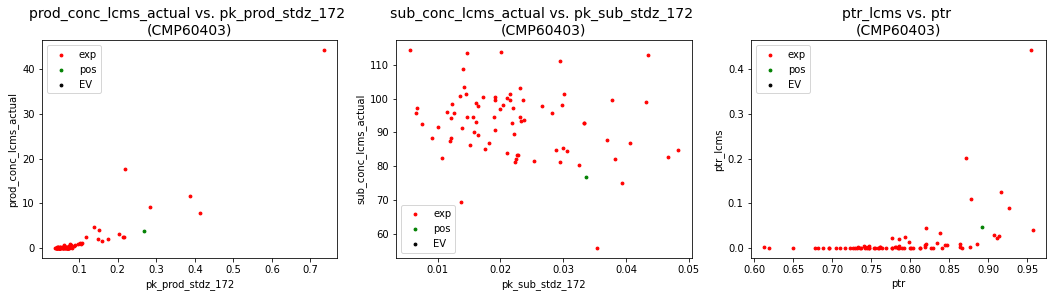

Spearman's rho for pk_prod_stdz_172_CMP60404 (MALDI) vs. pk_prod_stdz_172_CMP60404 (LCMS): 0.3862
Spearman's rho for pk_sub_stdz_172_CMP60404 (MALDI) vs. pk_sub_stdz_172_CMP60404 (LCMS): 0.4303
Spearman's rho for ptr_CMP60404 (MALDI) vs. ptr_CMP60404 (LCMS): 0.1622


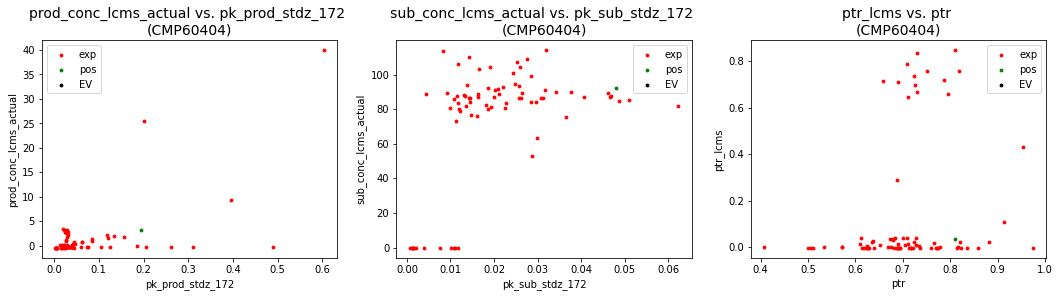

In [67]:
from utils.sql_utils import get_metric_filter_str
maldi_lcms_data_name = 'df_maldi_lcms'
hit_filter_dict = {
    f"{maldi_lcms_data_name}['ptr_lcms_CMP60354']": (1e-2, 1),
    f"{maldi_lcms_data_name}['ptr_lcms_CMP60403']": (1e-2, 1),
    f"{maldi_lcms_data_name}['ptr_lcms_CMP60404']": (1e-2, 1),
    f"{maldi_lcms_data_name}['true_score_binary_CMP60354']": (1, 0),
    f"{maldi_lcms_data_name}['true_score_binary_CMP60403']": (1, 0),
    f"{maldi_lcms_data_name}['true_score_binary_CMP60404']": (1, 0),
}
df_maldi_lcms_filtered = df_maldi_lcms[eval(get_metric_filter_str(hit_filter_dict, joiner=' | '))]
print(len(df_maldi_lcms_filtered))

for substrate_barcode in ['CMP60354', 'CMP60403', 'CMP60404']:
    plot_maldi_lcms_metrics_for_ctrls(df_maldi_lcms_filtered, ctrls_to_plot=['exp','pos','EV'], col_suffix=substrate_barcode)

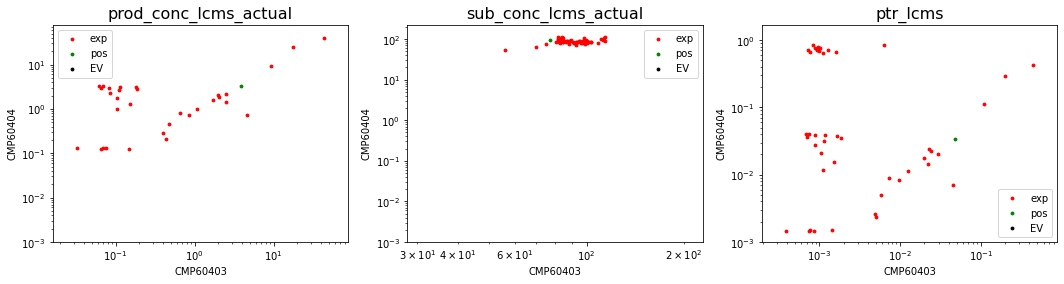

In [64]:
plot_lcms_metrics_for_ctrls(df_maldi_lcms_filtered, x_suffix='CMP60403', y_suffix='CMP60404', ctrls_to_plot=['exp','pos','EV'])